In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# settings
palette= ('silver','silver')
sns.set(style="whitegrid")
rcParams['font.sans-serif']='Times New Roman'
rcParams['mathtext.rm'] = 'Times New Roman'

# Import data
df = pd.read_excel('xxxxxxx.2024.xlsx',  sheet_name='Age, education level, etc')

# Clean data
df['AGE'] = df['AGE'].replace('Below 20', '< 21')
df['AGE'] = df['AGE'].replace('18-20', '< 21')
df['AGE'] = df['AGE'].replace(20, '< 21')
df['AGE'] = df['AGE'].replace('<21', '< 21')
df['AGE'] = df['AGE'].replace('>60', '> 60')
df = df.rename(columns={'GENDER': 'Gender'})


order =('< 21', '21-40', '41-60','> 60' )


df.head(1)

,S/NO.,NAME,AGE,Gender,OCCUPATION,ADDRESS,LOCATION,COUNTY,Species,Use,level of education,Date,Recognition,More or Less,Cultivation,Trade,Consrvation measures
0,1.0,Mercy Chechi,< 21,Female,Student,Sakant Primary School,Sila,West Pokot,K. lanceolata (Bebe-Pokot),Unknown,Primary,15.12.2019,Morphological,Less,No,No,No


In [31]:
new_row = {"NAME": "Dxxxxxxxx", "AGE": '41-60',"Gender": "Female", "OCCUPATION": "Female lecturer"}
df = df._append(new_row, ignore_index=True)


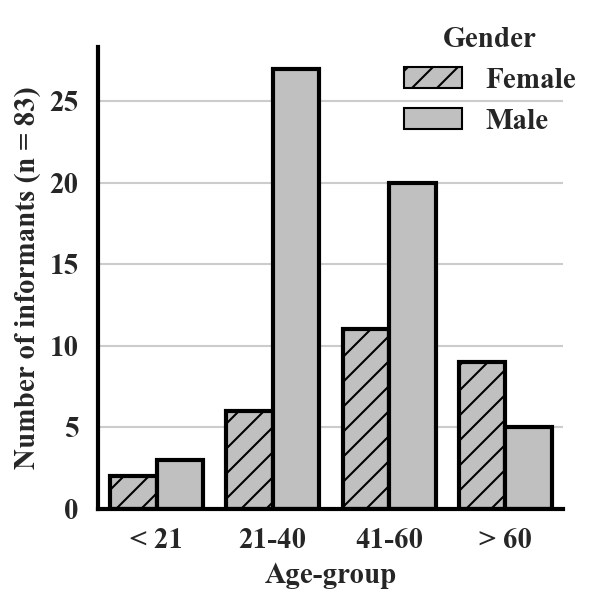

In [32]:





fig=plt.figure(figsize=(4,4),dpi=150)
# Plot using seaborn
ax= sns.countplot(x='AGE', hue='Gender',data= df, palette= palette, order = order,  edgecolor='black', linewidth= 2, color = 0.2)
plt.ylabel('Count')


# Apply hatching 
for patch, gender in zip(ax.patches, [df['Gender'][i // len(order)] for i in range(len(df))]):
    if gender == 'Female':
        patch.set_hatch('//')
        
# Create custom legend 
handles, labels = ax.get_legend_handles_labels()
hatch_handle = mpatches.Patch(facecolor='silver', edgecolor='black', hatch='', label='Male')
solid_handle = mpatches.Patch(facecolor='silver', edgecolor='black', hatch='//',label='Female')


ax.legend(handles=[solid_handle, hatch_handle], frameon = False, title='Gender', title_fontproperties={'weight': 'bold', 'size': 14}, prop = {'weight':'bold', 'size': 14}, bbox_to_anchor=(0.6, 1.1),)


# Adjust spines 
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# labels
plt.xlabel('Age-group', fontsize = 14, weight = 'bold')
plt.ylabel('Number of informants (n = 83)', fontsize = 14, weight = 'bold')


# adjust spines and ticks
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)


ax.tick_params(width = 2)
plt.xticks(size = 14, weight ='bold')
plt.yticks(size = 14, weight ='bold')


plt.savefig('C:\\Users\\Tori\\Downloads\\tfigure1.tif', bbox_inches='tight', dpi=150)

plt.show()

In [33]:
df.value_counts('AGE')

AGE
21-40    33
41-60    31
> 60     14
< 21      5
dtype: int64

In [34]:
df2 = pd.read_excel('xxxxxxxxxxx.2024.xlsx')

df2 = df2.rename(columns={'Unnamed: 1': 'Use-category'})
df2 = df2.sort_values(by = '% citation', ascending = False)

grouped_df2 = df2.groupby('Use categories')['% citation'].sum().reset_index()
grouped_df2 = grouped_df2.sort_values(by = '% citation', ascending = False)

# Filter rows where 'Use categories' is 'Medicine' and select specific columns
medicine_rows = df2[df2['Use categories'] == 'Medicine'][['Use-category', 'Nur (Number of use citation for each ailment)']]
medicine_rows['Nur (Number of use citation for each ailment)'].sum()

medicine_rows['Percentage of citations (%)'] = medicine_rows['Nur (Number of use citation for each ailment)'].apply(lambda x: (100 / 78) * x)
df2

,Use categories,Use-category,Nt (Number of species used for the ailment,Nur (Number of use citation for each ailment),Informant Consensus factor (ICF)-[Nur-Nt/Nur-1],% citation
1,Medicine,Injuries,9,22,0.52,23.90
2,Medicine,Muscular-skeletal system disorders,8,11,0.30,11.96
10,Medicine,Pain,9,9,0.00,9.78
0,Medicine,Digestive system disorders,8,8,0.00,8.70
3,Medicine,Blood system disorders,6,8,0.29,8.70
9,Medicine,Skin/subcutaneous cellular tissue disorders,7,8,0.14,8.70
7,Medicine,Infections,4,5,0.25,5.43
15,Environmental uses,NaN,4,4,0.00,4.34
5,Medicine,Reproductive system disorders,3,3,0.00,3.26
14,Food (vegetable),NaN,3,3,0.00,3.26


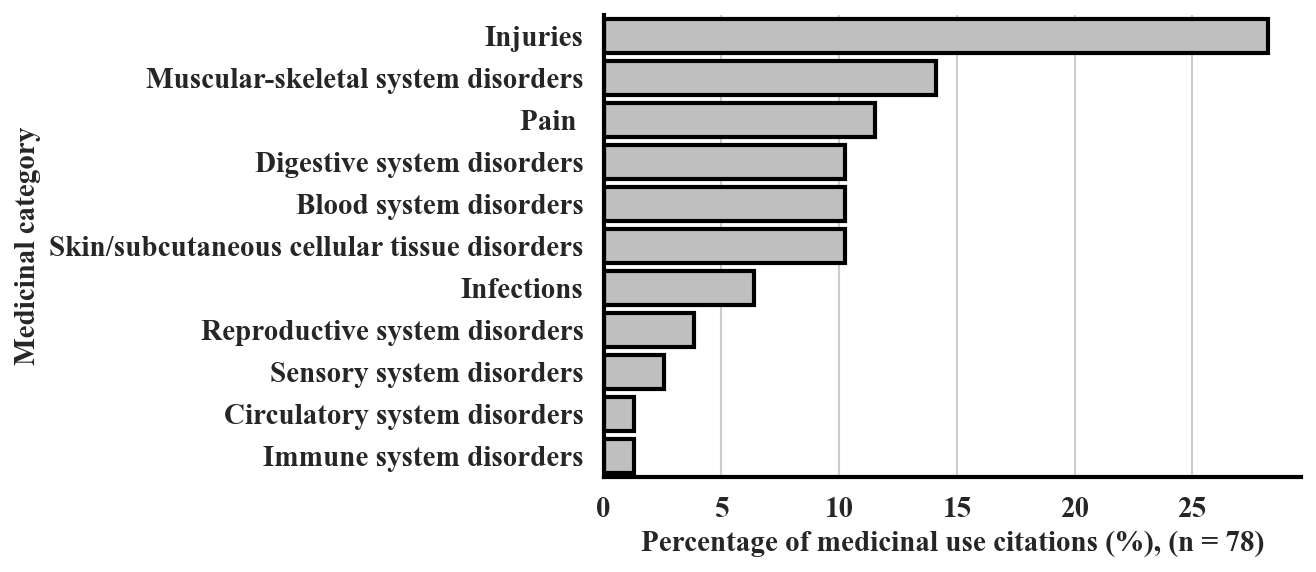

In [35]:
# Calculate percentages
#total_citations = medicine_rows['Nur (Number of use citation for each ailment)'].sum()
#medicine_rows['Percentage of citations (%)'] = (100/ total_citations) * medicine_rows['Nur (Number of use citation for each ailment)'] 
fig=plt.figure(figsize=(6,4),dpi=150)
ax = sns.barplot(data = medicine_rows, x ='Percentage of citations (%)', y = 'Use-category', edgecolor='black', color = 'silver', linewidth=2) 
plt.ylabel('Medicinal category', size = 14, weight = 'bold')
plt.xlabel('Percentage of medicinal use citations (%), (n = 78)', size = 14, weight = 'bold')

# Adjust spines 
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)

# adjust ticks
ax.tick_params(width = 2)
plt.xticks(size = 14, weight ='bold')
plt.yticks(size = 14, weight ='bold')

# Increase the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig('C:\\Users\\Tori\\Downloads\\tfigure2.tif', bbox_inches='tight', dpi=150)
plt.show()

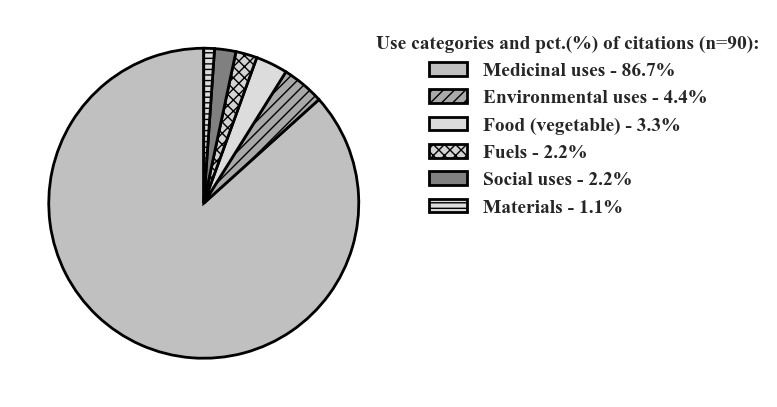

In [36]:
# Add the data
data = {
    'Use categories': ['Medicinal uses', 'Environmental uses', 'Food (vegetable)', 'Fuels', 'Social uses', 'Materials'],
    '% citation': [86.66666666, 4.44444444, 3.333333, 2.222222, 2.222222222, 1.11111111]
}
grouped_df2 = pd.DataFrame(data)


# Set palette
palette = ['silver', 'darkgrey', 'gainsboro', 'lightgrey', 'grey', 'gainsboro']

# Set patterns
hatches = ['', '///', '', 'xxx', '', '---']

# Create the pie chart
fig, ax = plt.subplots(figsize=(5, 7))

wedges, texts = ax.pie(
    grouped_df2['% citation'],
    colors=palette,
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 2},
     radius=1  # Reduce the radius to make the pie smaller
)

# Apply hatches 
for wedge, hatch in zip(wedges, hatches):
    wedge.set_hatch(hatch)

# Combine categories and percentages for legend labels
legend_labels = [f'{category} - {pct:.1f}%' for category, pct in zip(grouped_df2['Use categories'], grouped_df2['% citation'])]

# Create custom legend
ax.legend(wedges, legend_labels, title="Use categories and pct.(%) of citations (n=90):", 
          loc="center left",    title_fontproperties={'weight': 'bold', 'size': 14}, frameon = False, bbox_to_anchor=(0.9, 0.7), prop = {'weight':'bold', 'size': 14})


plt.savefig('C:\\Users\\Tori\\Downloads\\tfigure3.tif', bbox_inches='tight', dpi=150)
plt.show()


C:\Users\Tori\AppData\Local\Temp\ipykernel_21868\1859807038.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df['Species'], weight = 'bold', fontsize = 14)


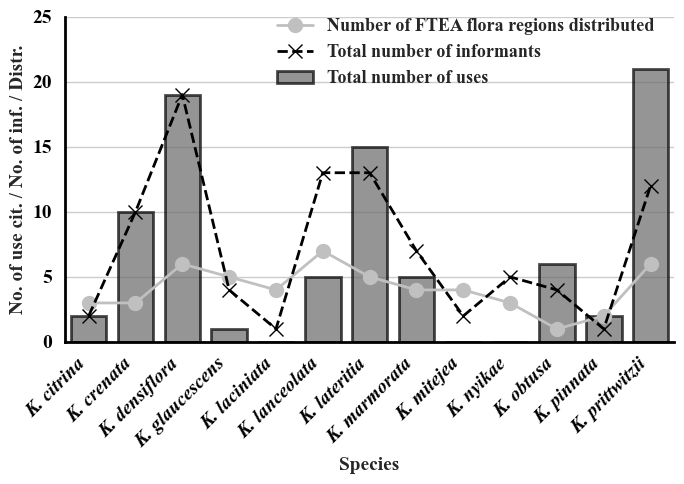

In [39]:

# Create DataFrame from data
data = {
    'Species': ['K. prittwitzii', 'K. lanceolata', 'K. densiflora', 'K. laciniata', 'K. marmorata', 'K. crenata', 
                'K. lateritia', 'K. nyikae', 'K. glaucescens', 'K. obtusa', 'K. citrina', 'K. mitejea', 'K. pinnata'],
    'Distribution': [6, 7, 6, 4, 4, 3, 5, 3, 5, 1, 3, 4, 2],
    'Uses': [21, 5, 19, 0, 5, 10, 15, 0, 1, 6, 2, 0, 2]
}
df = pd.DataFrame(data)

# Sort DataFrame by Species
df = df.sort_values(by='Species').reset_index(drop=True)

# Data for species counts
species_count_data = {
    'Species': ['densiflora', 'lanceolata', 'lateritia', 'prittwitzii', 'crenata', 'marmorata', 'nyikae', 
                'glaucescens', 'obtusa', 'citrina', 'mitejea', 'laciniata', 'pinnata'],
    'Count': [19, 13, 13, 12, 10, 7, 5, 4, 4, 2, 2, 1, 1]
}
df_counts = pd.DataFrame(species_count_data)


# Make sure both DataFrames have the same order of species
df_counts = df_counts.set_index('Species').reindex(df['Species'].str.split('. ', expand=True)[1], fill_value=0).reset_index()

# Calculate x-axis positions for bars
x = np.arange(len(df['Species']))
width = 0.76 

# Plotting the data
fig, ax = plt.subplots(figsize=(7, 5))

# Remove vertical grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)



# Bar chart for Uses
ax.bar(x, df['Uses'], width=width, color='dimgray', edgecolor='black', linewidth=2, alpha=0.7, label='Total number of uses')
ax.set_ylabel('No. of use cit. / No. of inf. / Distr.', fontsize=14, weight = 'bold')
ax.set_ylim(0, max(max(df['Uses']), max(df['Distribution']), max(df_counts['Count'])) + 4)  # Ensure y-axis starts at 0 and has some padding

# Line chart for Distribution 
ax.plot(x, df['Distribution'], color='silver', marker='o', markersize=10, linewidth=2, label='Number of FTEA flora regions distributed')

# Line chart for informants counts
ax.plot(x, df_counts['Count'], color='black', marker='x', markersize=10, linewidth=2, linestyle='--', label='Total number of informants')

# Labels and title
ax.set_xlabel('Species', fontsize=14, weight = 'bold')

# Adjust x-axis ticks
ax.set_xticks(x)
ax.set_xticklabels(df['Species'], rotation=45, ha='right', fontsize=14, fontstyle='italic', weight = 'bold')
ax.set_yticklabels(df['Species'], weight = 'bold', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=2, colors='black')

# Adjustments ticks
ax.set_yticks(np.arange(0, max(max(df['Uses']), max(df['Distribution']), max(df_counts['Count'])) + 5, 5))
ax.set_yticklabels([str(i) if i % 5 == 0 else '' for i in np.arange(0, max(max(df['Uses']), max(df['Distribution']), max(df_counts['Count'])) + 5, 5)])

# Spines adjustment
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)

# Remove white spaces on the sides of the chart
ax.set_xlim(-0.5, len(df['Species']) - 0.5)

# Add legends
fig.legend(loc="upper right", bbox_to_anchor=(0.97,0.98), frameon = False, prop = {'weight':'bold', 'size': 13})

plt.tight_layout()

plt.savefig('C:\\Users\\Tori\\Downloads\\tfigure4.tif', bbox_inches='tight', dpi=150)
plt.show()
